In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [64]:
df.shape

(13200, 7)

In [65]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [66]:
min_thresold,max_thresold=df.price_per_sqft.quantile([0.001,0.999])
min_thresold,max_thresold

(1366.184, 50959.36200000098)

Remove outlier using percentile and create a new dataframe

In [67]:
df2=df[(df.price_per_sqft>min_thresold)&(df.price_per_sqft<max_thresold)]
df2.shape

(13172, 7)

In [68]:
df.shape[0]-df2.shape[0]

28

In [69]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


Outlier removal using standard deviation

In [70]:
upper_limit=df2.price_per_sqft.mean()+4*df2.price_per_sqft.std()
lower_limit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()

In [71]:
df3=df2[(df2.price_per_sqft<upper_limit)&(df2.price_per_sqft>lower_limit)]
df3.shape

(13047, 7)

In [72]:
df2.shape[0]-df3.shape[0]

125

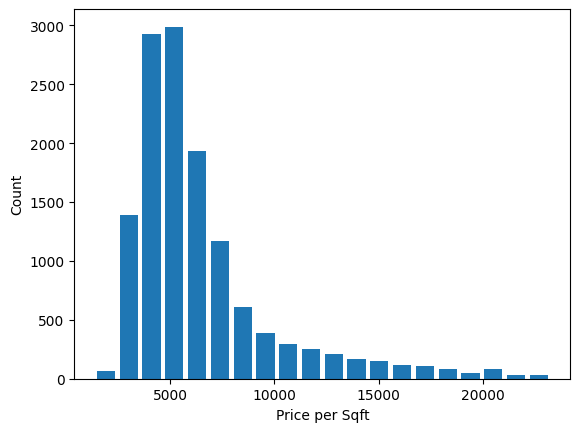

In [73]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price per Sqft")
plt.ylabel("Count")
plt.show()

In [74]:
from scipy.stats import norm
import numpy as np

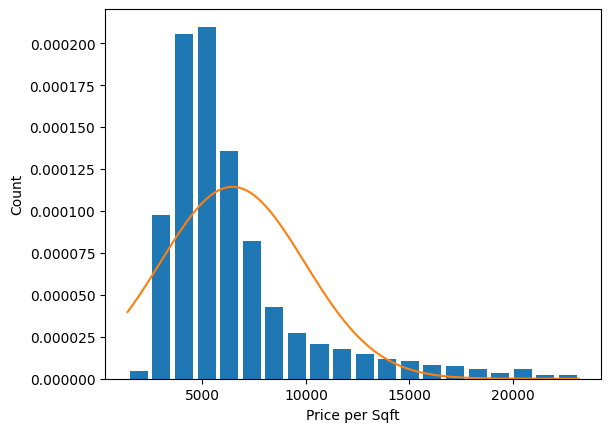

In [75]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8,density=True)
plt.xlabel("Price per Sqft")
plt.ylabel("Count")

rng=np.arange(df3.price_per_sqft.min(),df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [76]:
df2["Z_score"]=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10568\3728169551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Z_score"]=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [77]:
df4=df2[(df2.Z_score>-4)&(df2.Z_score<4)]
df4.shape

(13047, 8)